In [1]:
!python3 -m pip install Tweepy
!python3 -m pip install pandas
!pip install nltk
!pip install textblob
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('words')
nltk.download("stopwords")
nltk.download('omw-1.4')

Successful Authentication


In [4]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from textblob import Word
import tweepy
import pandas as pd
import os
import datetime

In [2]:
api_key = "xx"
api_key_secret = "xxx"
access_key = "xx-xx"
access_key_secret = "xxxx"
        

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_key,access_key_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

try:
    api.verify_credentials()
    print('Successful')
except:
    print('Failed')

Successful


In [13]:
df = pd.DataFrame(columns=['text', 'screen_name', 'created_at', 'favorite_count', 'id'])
msgs = []
msg =[]

ids = set()
for tweet in tweepy.Cursor(api.search_tweets, q='#türkiye -filter:retweets',
                           lang='tr', until = '2022-09-05').items(5000):
    msg = [tweet.text, tweet.user.screen_name, tweet.created_at, tweet.favorite_count, tweet.id] 
    msg = tuple(msg)                    
    msgs.append(msg)
    ids.add(tweet.id) # add new id
    
    
print ("number of unique ids seen so far: {}",format(len(ids)))
df = pd.DataFrame(msgs)
df.columns = ['text', 'screen_name', 'created_at', 'favorite_count', 'id']

Rate limit reached. Sleeping for: 224
Rate limit reached. Sleeping for: 820


KeyboardInterrupt: 

## tweet çekmeden aşagıdan devam edilebilir

In [12]:
df.to_csv('test8eyllbest2.csv')

In [14]:
file_names = ['test8eyllbest.csv', 'test8eyll1.csv', 'test8eyll2.csv']
data_all = pd.concat((pd.read_csv(i) for i in file_names)).reset_index(drop = True)
data_all.to_csv('test8eyllbmerged.csv')

In [15]:
data2 = pd.read_csv('test1.csv')
data2_text = data2['text']
print(data2_text.head())

0    “Sübhânallâhi adede halkıhî, sübhânallâhi rızâ...
1    Antik Mısır Matematiği ve Mısır Medeniyetinin ...
2    RT @yeryuzukolej: #Antalya #Türkiye #lgs #lgs2...
3    @_FenerTeam #Fenerbahce #tuerkiye https://t.co...
4    #profil #ekle #İstanbul #türkiye #levent #masl...
Name: text, dtype: object


In [16]:
data1 = pd.read_csv('test8eyllbmerged.csv')
data1_text = data1['text']
print(data1_text.head())

0    Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1    @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2    Üçte biri sular altında kalan #pakistan ın yar...
3    Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4    #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...
Name: text, dtype: object


In [17]:
data_1_2 = pd.concat([data1_text, data2_text],  axis=0)
print(data_1_2.head())

0    Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1    @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2    Üçte biri sular altında kalan #pakistan ın yar...
3    Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4    #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...
Name: text, dtype: object


In [18]:
data_1_2.to_csv('merged8eylul.csv')

In [22]:
df = pd.read_csv("merged8eylul.csv",delimiter=',')
print(df.head())

   Unnamed: 0                                               text
0           0  Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1           1  @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2           2  Üçte biri sular altında kalan #pakistan ın yar...
3           3  Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4           4  #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...


## veri temizligi

In [23]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
sw = stopwords.words('turkish')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

/tmp/ipykernel_3710/3478140775.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
/tmp/ipykernel_3710/3478140775.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d','')


In [24]:
df.head()
#df.to_csv('trainclear.csv')

,Unnamed: 0,text
0,0,kocaelide minibüs çarpıştı yaralı kocaeli traf...
1,1,hakan_ _bolsevik sonsuzluk__ tanıdık geliyor a...
2,2,üçte sular altında kalan pakistan ın yaraların...
3,3,conro tipi gemi türkiyeçin arasında çalışacak ...
4,4,istanbul eyl sıcaklık c bulutlu rüzgar kd kmh ...


In [25]:
#seyrek kelimeleri belirliyorum ve data dan siliyorum

textss = " ".join(df['text'])
textss = textss.split()
print(len(textss))

42787


In [51]:
freqquency = pd.Series(textss).value_counts()

In [52]:
#freqquency = freqquency[:5]
freqquency = freqquency[-50:]

In [53]:
freqquency

iddialarında          1
httpstcoyfulpclqth    1
spkgovtr              1
yuninvest             1
bmylz                 1
namikgokalp           1
nnfhedefportfoy       1
hedefgirisim          1
httpstcolagqjnavz     1
telefonları           1
bülent                1
kanalımda             1
httpstcojuexjwlk      1
görüşme               1
vatanımızdan          1
çıkışımda             1
bezenmiş              1
kilim                 1
dokunm                1
httpstcojaycwxhxp     1
toplantı              1
aralarındaki          1
nazlısaraçorak        1
alanlarını            1
httpstcoaezytdsvsh    1
komşu                 1
bizden                1
httpstcokhgdngnfp     1
turizm                1
talebi                1
httpstcocuyjzjuix     1
telaşımız             1
dönüştürme            1
yığınına              1
httpstcobnyylg        1
httpstcosavgqp        1
httpstcopemziir       1
akyazı                1
httpstcoleucejkiz     1
medeniyetlerin        1
kurulduğu             1
imparatorlukları

In [54]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

   Unnamed: 0                                               text
0           0  kocaelide minibüs çarpıştı yaralı kocaeli traf...
1           1  hakan_ _bolsevik sonsuzluk__ tanıdık geliyor a...
2           2  üçte sular altında kalan pakistan ın yaraların...
3           3  conro tipi gemi türkiyeçin arasında çalışacak ...
4           4                                                   


In [55]:
freqquency = pd.Series(textss).value_counts()
freqquency = freqquency[-170:]
print(freqquency)

httpstcosowpmgwke     1
httpstcocnzgtaia      1
siper                 1
başardı               1
httpstcoxpkdknf       1
                     ..
köşesi                1
httpstcoeibeedpidf    1
kıymetini             1
bilmeyip              1
kullanın              1
Length: 170, dtype: int64


In [56]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

   Unnamed: 0                                               text
0           0  kocaelide minibüs çarpıştı yaralı kocaeli traf...
1           1  hakan_ _bolsevik sonsuzluk__ tanıdık geliyor a...
2           2  üçte sular altında kalan pakistan ın yaraların...
3           3  conro tipi gemi türkiyeçin arasında çalışacak ...
4           4                                                   


In [57]:
#worldcloud deneme
!pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


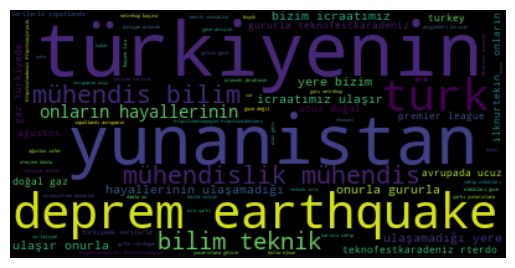

In [58]:
text = " ".join(df['text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

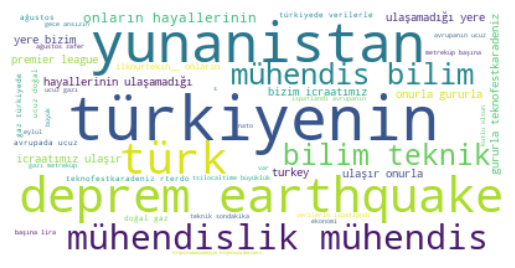

In [59]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [35]:
wordcloud.to_file("kelime_bulutu.png");

In [60]:
df_yedek = df
print(df_yedek.head())

   Unnamed: 0                                               text
0           0  kocaelide minibüs çarpıştı yaralı kocaeli traf...
1           1  hakan_ _bolsevik sonsuzluk__ tanıdık geliyor a...
2           2  üçte sular altında kalan pakistan ın yaraların...
3           3  conro tipi gemi türkiyeçin arasında çalışacak ...
4           4                                                   


In [74]:
!pip install textblob
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mertcan/nltk_data...


True

In [66]:
from textblob import TextBlob
import sys
import os
import nltk
import re
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [67]:

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [76]:
#Calculating Negative, Positive, Neutral and Compound values

df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].iteritems():
     score = SentimentIntensityAnalyzer().polarity_scores(row)
     neg = score['neg']
     neu = score['neu']
     pos = score['pos']
     comp = score['compound']
     if neg > pos:
            df.loc[index, 'sentiment'] = "negative"
     elif pos > neg:
            df.loc[index, 'sentiment'] = "positive"
     else:
             df.loc[index, 'sentiment'] = "neutral"
             df.loc[index, 'neg'] = neg
             df.loc[index, 'neu'] = neu
             df.loc[index, 'pos'] = pos
             df.loc[index, 'compound'] = comp

df.head(10)

,Unnamed: 0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,kocaelide minibüs çarpıştı yaralı kocaeli traf...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,1,hakan_ _bolsevik sonsuzluk__ tanıdık geliyor a...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2,üçte sular altında kalan pakistan ın yaraların...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,3,conro tipi gemi türkiyeçin arasında çalışacak ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,4,,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,5,bulutlar,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,6,no reunimos con becarios yurtdisiturkler ecuad...,0.0,0.0,negative,NaN,NaN,NaN,NaN
7,7,teknoloji takımı vakfı t vakfı sanayi teknoloj...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,8,sı çocuk can kaybı uncu uçak kardeş ülkeye ind...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,9,bor elementinin bitkiler önemi nedir ziraatmüh...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
